---
## Import packages

In [ ]:
 ''''
    !pip install farasapy
!pip install Tashaphyne==0.3.4.1
 !pip install wordcloud
 !pip install ar_wordcloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
gensim.download()
''''

In [6]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

import gensim, spacy, logging
import gensim.corpora as corpora
import gensim.utils 
import gensim.models 



In [1]:

from ar_wordcloud import ArabicWordCloud

import pyarabic.araby as araby
import pyarabic.number as number
from tashaphyne.stemming import ArabicLightStemmer
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

In [2]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
import string
import time
import unicodedata as ud
import arabic_reshaper
import re

In [4]:
from farasa.pos import FarasaPOSTagger
from farasa.ner import FarasaNamedEntityRecognizer
from farasa.diacratizer import FarasaDiacritizer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer

## Read and exploring the data

In [10]:
df = pd.read_csv('all_poems.csv')
df

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,21,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي...,أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
1,65546,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,انا لا ازال و في يدي قدحي ياليل اين تفرق الشر...,أقداح و أحلام,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
2,65561,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,علي مقلتيك ارتشفت النجوم وعانقت امالي الايبة ...,هوى واحد !,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
3,65554,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اساطير من حشرجات الزمان نسيج اليد البالية رواه...,أساطير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
4,65550,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,والتف حولك ساعداي ومال جيدك في اشتهاء كالزهرة ...,اللقاء الأخير,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doW...,بدر شاكر السياب
...,...,...,...,...,...,...,...,...,...
58016,86613,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,لروح صهيل لا تحويه الاوقات ذنبك انك تمتد علي ا...,الوقت,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58017,86614,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,اه لو اني ابني الشمس بعيني من طين هواء وسراب م...,الفلاح,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58018,86615,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,في عينيك يا امي لماذا الدمع منتظم كعقد الءلء ا...,أمّي,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف
58019,86616,http://www.adab.com/modules.php?name=Sh3er&doW...,فصحى,النوم يوقظ طرفي الظامي علي لحن تموج من بعيد ار...,عن اللحن,سوريا,755,http://www.adab.com/modules.php?name=Sh3er&doW...,عز الدين اليوسف


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58021 entries, 0 to 58020
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   poem_id     58021 non-null  int64 
 1   poem_link   58021 non-null  object
 2   poem_style  58021 non-null  object
 3   poem_text   58020 non-null  object
 4   poem_title  58021 non-null  object
 5   poet_cat    58021 non-null  object
 6   poet_id     58021 non-null  int64 
 7   poet_link   58021 non-null  object
 8   poet_name   58021 non-null  object
dtypes: int64(2), object(7)
memory usage: 4.0+ MB


In [12]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
# To display full text
pd.set_option('display.max_colwidth',-1)#can see the whole data on one single row
# complaints_df
df

,poem_id,poem_link,poem_style,poem_text,poem_title,poet_cat,poet_id,poet_link,poet_name
0,21,http://www.adab.com/modules.php?name=Sh3er&doWhat=shqas&qid=21&r=&rc=0,فصحى,"عيناك غابتا نخيل ساعة السحر او شرفتان راح يناي عنهما القمر عيناك حين تبسمان تورق الكروم وترقص الاضواء كالاقمار في نهر يرجه المجذاف وهنا ساعة السحر كانما تنبض في غوريهما النجوم وتغرقان في ضباب من اسي شفيف كالبحر سرح اليدين فوقه المساء دفء الشتاء فيه وارتعاشة الخريف والموت والميلاد والظلام والضياء فتستفيق ملء روحي رعشة البكاء ونشوة وحشية تعانق السماء كنشوة الطفل اذا خاف من القمر كان اقواس السحاب تشرب الغيوم وقطرة فقطرة تذوب في المطر وكركر الاطفال في عراءش الكروم ودغدغت صمت العصافير علي الشجر انشودة المطر مطر مطر مطر تثاءب المساء والغيوم ما تزال تسح ما تسح من دموعها الثقال كان طفلا بات يهذي قبل ان ينام بان امه – التي افاق منذ عام فلم يجدها ثم حين لج في السءال قالوا له ""بعد غد تعود "" لا بد ان تعود وان تهامس الرفاق انها هناك في جانب التل تنام نومة الحود تسف من ترابها وتشرب المطر كان صيادا حزينا يجمع الشباك ويلعن المياه والقدر وينثر الغناء حيث يافل القمر مطر مطر اتعلمين اي حزن يبعث المطر وكيف تنشج المزاريب اذا انهمر وكيف يشعر الوحيد فيه بالضياع بلا انتهاء – كالدم المراق كالجياع كالحب كالاطفال كالموتي – هو المطر ومقلتاك بي تطيفان مع المطر وعبر امواج الخليج تمسح البروق سواحل العراق بالنجوم والمحار كانها تهم بالشروق فيسحب اليل عليها من دم دثار اصيح بالخليج "" يا خليج يا واهب الءلء والمحار والردي "" فيرجع الصدي كانه النشيج "" يا خليج يا واهب المحار والردي "" اكاد اسمع العراق يذخر الرعود ويخزن البروق في السهول والجبال حتي اذا ما فض عنها ختمها الرجال لم ترك الرياح من ثمود في الواد من اثر اكاد اسمع النخيل يشرب المطر واسمع القري تءن والمهاجرين يصارعون بالمجاذيف وبالقلوع عواصف الخليج والرعود منشدين "" مطر مطر مطر وفي العراق جوع وينثر الغلال فيه موسم الحصاد لتشبع الغربان والجراد وتطحن الشوان والحجر رحي تدور في الحقول حولها بشر مطر مطر مطر وكم ذرفنا ليلة الرحيل من دموع ثم اعتلنا – خوف ان نلام – بالمطر مطر مطر ومنذ ان كنا صغارا كانت السماء تغيم في الشتاء ويهطل المطر وكل عام – حين يعشب الثري – نجوع ما مر عام والعراق ليس فيه جوع مطر مطر مطر في كل قطرة من المطر حمراء او صفراء من اجنة الزهر وكل دمعة من الجياع والعراة وكل قطرة تراق من دم العبيد فهي ابتسام في انتظار مبسم جديد او حلمة توردت علي فم الوليد في عالم الغد الفتي واهب الحياة مطر مطر مطر سيعشب العراق بالمطر "" اصيح بالخليج "" يا خليج يا واهب الءلء والمحار والردي "" فيرجع الصدي كانه النشيج "" يا خليج يا واهب المحار والردي "" وينثر الخليج من هباته الكثار علي الرمال رغوه الاجاج والمحار وما تبقي من عظام باءس غريق من المهاجرين ظل يشرب الردي من لجة الخليج والقرار وفي العراق الف افعي تشرب الرحيق من زهرة يربها الفرات بالندي واسمع الصدي يرن في الخليج "" مطر مطر مطر في كل قطرة من المطر حمراء او صفراء من اجنة الزهر وكل دمعة من الجياع والعراة وكل قطرة تراق من دم العبيد فهي ابتسام في انتظار مبسم جديد او حلمة توردت علي فم الوليد في عالم الغد الفتي واهب الحياة "" ويهطل المطر",أنشودة المطر,العراق,2,http://www.adab.com/modules.php?name=Sh3er&doWhat=lsq&shid=2&start=0,بدر شاكر السياب
1,65546,http://www.adab.com/modules.php?name=Sh3er&doWhat=shqas&qid=65546&r=&rc=1,فصحى,"انا لا ازال و في يدي قدحي ياليل اين تفرق الشرب ما زلت اشربها و اشربها حتي ترنح افقك الرحب الشرق عفر بالضباب فما يبدو فاين سناك يا غرب ما لنجوم غرقن من سام في ضوءهن و كادت الشهب انا لا ازال و في يدي قدحي ياليل اين تفرق الشرب ****** الحان بالشهوات مصطخب حتي يكاد بهن ينهار و كان مصاحبيه من ضرج كفان مدهما لي العار كفان بل ثغران قد صبغا بدم تدفق منه تيار كاسان ملءهما طلي عصرت من مهجتين رماهما الحب او مخلبان عليهما مزق حمراء تزعم انها قلب ****** الخمر جمعت الدهور , ومافيهن بين جوانب الحان ياويحها اسكرت ام سكرتام نحن في السكرات سيان رمت العوالم والدهور علي ثغري وفوق يدي واجفاني كفي تمد فما تناولني كاسا لعيني خمرها نهب واصافح الدنيا فياعجبا البعد لان واعرض القرب ****** يا ليل اين تطوف بي قدمي في اي منعرج من الظلم تلك السبيل اكاد اعرفها بالامس خاصر طيفها حلمي هي غمد خنجرك الرهيب و قد جردته و مسحت عنه دمي تلك السبيل علي جوانبها تمزق الخطوات او تكبو تثاءب الاجساد جاءعة فيها كما يتثاءب الذءب حسناء يلهب عريها ظماي فاكاد اشرب ذلك العريا و اكاد احطمه فتحطمني عينان جاءعتان كالدنيا غرست يد ال

## NLP Preprocessing

In [15]:
max(df.poem_text.str.len())

66350.0

In [16]:
min(df.poem_text.str.len())

1.0

**removing observtions less than 120**

In [17]:
df = df[df.poem_text.str.len() > 120]

In [18]:
df.shape

(47110, 9)

In [19]:
df.poem_text.isna().sum()

0

### **Removing Non-arabic letters, numbers, amiss typo and special characters**


In [20]:
# function to clean and normalize text 
def clean_text(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ? ',' ؟ ',' ! ']  
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')
    
    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])
        
    text = text.strip()
    
    return text

In [21]:
arabic_punctuations = '''«»`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    
    return text


def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text


def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [22]:
# clean and normalize text
df.poem_text  = df.poem_text.apply(lambda x: clean_text(x))

# remove punctuation
df.poem_text  = df.poem_text.apply(lambda x: remove_punctuations(x))

# remove diacritics
df.poem_text  = df.poem_text.apply(lambda x: remove_diacritics(x))

# remove repeating char
df.poem_text  = df.poem_text.apply(lambda x: remove_repeating_char(x))

# remove english letters
df.poem_text = df.poem_text.apply(lambda x: re.sub(r'[a-zA-Z]', '', x))

# remove a special character 
df.poem_text = df.poem_text.apply(lambda x: re.sub(r'[_]+', '', x))

# remove english numbers
df.poem_text = df.poem_text.apply(lambda x: re.sub(r'/[0-9\u0621-\u064A]+/u', '', x))

# remove space
df.poem_text  = df.poem_text.str.replace('\d+', '')

In [23]:
# Convert to list
data = df[df.columns[3]].values.tolist()

### **Stemming**

In [24]:
stopـwords =nltk.corpus.stopwords.words("arabic")
stopـwords.extend(['هـ', 'د', 'م', 'الى', 'ان', 'اذ', 'لهذه',
                   'قال', 'وقال', 'اكد', 'عدد', 'بعدد', 'وعدد'
                   , 'والتي', 'بن', 'بنت', 'وقد', 'ا', 'عبر',
                   'خلال', 'او', 'الا', 'وان', 'اي', 'بان', 'كان'
                   , 'كانت' ,'تم','الف','مليون', 'وفي', 'وقد','اكثر','اقل'
                   , 'انه','وانه', 'قالت', 'وقالت', 'وتم','اذا', 'وسوف', 'ه', 'م', 'كثير',
                   'ودليل', 'معهم','مصدر'
                   ,'مر','على','تنتهي','كبيرة','تستمر','الفرج','وواضح','وصاحب',
                   'يتم','،وذلك','تكون','عليها'
                   ,'انها','امس','العامه','الثاني','لاداره','اكبر','الف','اليوم'
                   ,'خلال','الاسبوع','اباغسطس','اباطيلهم','ابارك','ابارا','ابار','اباده','اباحيا','اباتشي',
                   'ابابا','ابائهم','ابائه','اباؤهم','اباؤنا','اباؤكن','اباءهم','اباءنا','اباء','ابا'
                   ,'اب','ائمه','ائذن','ائتماني','ائتلافيه','ائتلافا','ئايه','اباحه','ابالخيل'
                   ,'ابالغ','ابان','ابانات','ابانها','اباه','اباوت',
                   'ابت','ابتد','ابتدا','ابتداء','ابتدائي',
                   'ابتدائيا','ابتدائيه','ابتدات','ابتدعها','ابتدعوا','ابتسام','ابتسامات','ابتسامتكم',
                   'ابتسامتها','ابتسامتهم','ابتسامه'
                   ,'ابتسم','ابتسمت'
                   ,'ابتعاثاهل','ابتعاثهم'
                   ,'ﺍﻟﻔﻴﻮﺵ','ﺍﻟﻤﺨﺘﻠﻔﺔ','ﺍﻟﻤﻨﺎﻃﻖ','ﺍﻟﻤﻄﺎﺭ','ﺍﻟﻤﻌﻨﻴﺔ','ﺑﺎﺏ','ﺑﻤﺮﻳﺲ',
                   'ﺣﺎﻟﻴﺎ','ﺣﺘﻰ','ﺩﺍﺭ','ﺳﺘﻮﺍﺻﻞ','ﻋﻤﻠﻴﺎﺗﻬﺎ'
                   ,'ﻓﻲ','ﻛﻞ','ﻟﻌﻮﺩﺓ','ﻣنطقه','ﻣﺠﺎﻝ','ﻣﻊ','ﻣﻦ','ﻭان','ﻭﺍﺳﺘﻘﺒﺎﻝ'
                   ,'ﻭﺍﻟﻜﺜﻴﺮ','ﻷي','ﻹكمال','ﻹنشائه','ﻭﻣﻌﺎﺭﻙ','ﻭﻣﺴﺘﻘﺮﺓ','ﻭﺍﻟﻤﻮﺍﻧﺊ','ﺇﻟﻰ','ائتمانيه'
                   ,'اؤمن','اؤدي','اؤكد','ابتعاده',
                   'ابتعادهم','ابتعث','ابتعثت','ابتعدت','ابتعدوا','ابتغي','ابتكارا',
                   'ابتكارات','ابتكاره','ابتكر','ابتكرها'
                   ,'ابتكروا','ابتلعت','ابتليت','ابجديتي'
                   ,'يونيوحزيران','يونيور','يونيون','يونيكريدت','يونيه','یعني','يويو','',
                   '','','','','','','','','','','','','','','','',
                   '','','','','','','','','','','','','','','','',
                   '','','','','','','','','','','','','','','','',
                   '','','','','','','','','','','','','','','','',
                   '','','','','','','','','','','','','','','','',
                   '','','','','','','','','','','','','','','','',
                   '','','','','','','','','','','','','','','','',
                   '','','','','','','','','','','','','','','','',
                   '','','','','','','','','','','','','','','','',])

In [25]:
#stemming as experiment
def apply_stemming_and_Stopwords(texts):
    st = ISRIStemmer()
    return [[st.stem(word) for word in gensim.utils.simple_preprocess(str(doc)) if word not in stopـwords] for doc in texts]

In [26]:
stemmstop_word=apply_stemming_and_Stopwords(df.poem_text)

### **TF-IDF Vectorizer**

In [ ]:
# the document-term matrix 
tfidf = TfidfVectorizer(stop_words=stopـwords)
doc_words = tfidf.fit_transform(df.poem_text)
pd.DataFrame(doc_words.toarray(),columns=tfidf.get_feature_names())

## EDA

In [87]:
Poet= df['poet_name'].value_counts()[0:5]
Poet

ابن الرومي            1549
أبوالعلاء المعري      1363
جبران خليل جبران      977 
عبد الغني النابلسي    875 
البحتري               855 
Name: poet_name, dtype: int64

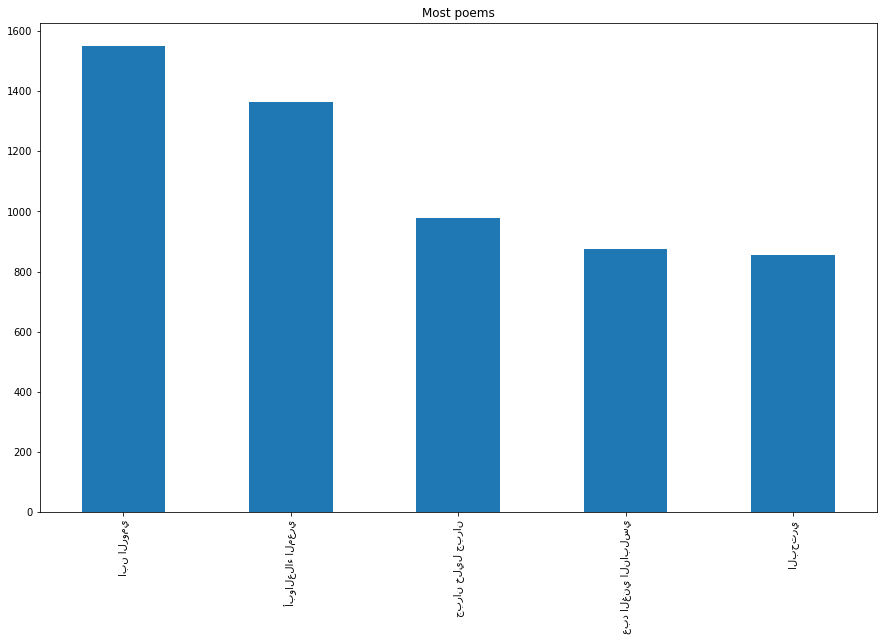

In [66]:

Poet.plot(kind='bar', title= 'Most poems' , figsize=(15,9));


source Distribution

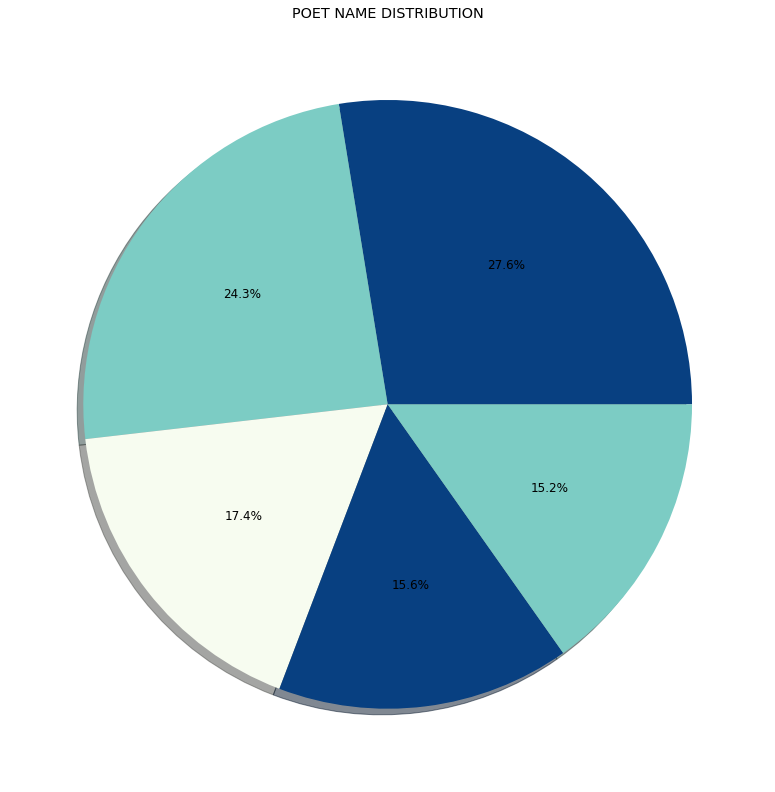

In [95]:
targetCounts = df['poet_name'].value_counts()[:5]
targetLabels  = df['poet_name'].unique()[:5]
# Make square figures and axes
plt.figure(1, figsize=(30,30))
the_grid = GridSpec(2, 2)

#Blues_r #PuBuGn #Sequential
cmap = plt.get_cmap('GnBu_r')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, 
            title= 'POET NAME DISTRIBUTION')

source_pie = plt.pie(targetCounts, autopct='%1.1f%%', shadow=True, colors=colors)

## **Topic Modeling**


1. NMF

In [98]:
# function to display topics with words
from sklearn.decomposition import NMF, LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
#         else:
#             print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    

def display_top(model, feature_names, no_top_words, topic_names=None):
    
    my_dict = {'topic_0':'','topic_1':'','topic_2':'','topic_3':'','topic_4':''}
    ctr = 0
    for ix, topic in enumerate(model.components_):
                #if not topic_names or not topic_names[ix]:
#             print("\nTopic ", ix)
        txt = ",".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        my_dict['topic_'+str(ctr)] = txt
        ctr+=1
#         print('words are::: ',txt)
    return my_dict

In [100]:
topic_nums = list(np.arange(3, 6, 1))

#nmf_models = []
for num in topic_nums:
    nmf = NMF(num)
    #nmf_models.append(nmf)
    nmf.fit_transform(doc_words)
    display_topics(nmf, tfidf.get_feature_names(), 50)
    print("------------------------------------------")


Topic  0
علي, اله, الي, فما, ولم, الدهر, حتي, الناس, يوم, فان, ال, لقد, وكم, عنه, الزمان, المجد, فلم, منك, فقد, خير, ابن, الدنيا, بني, تري, ام, منهم, اليه, الوري, وهي, وليس, اهل, واذا, يكن, الملك, الحق, فتي, مصر, العلي, اما, كنت, فيا, ملك, الدين, اني, وهل, القوم, وكان, قوم, راي, ابي

Topic  1
علي, الي, اليل, الارض, الان, البحر, بلا, الريح, الموت, حتي, الماء, الشمس, اخر, الروح, وانا, الحياه, اين, السماء, الطريق, ايها, الوقت, وجه, الصمت, الفجر, المساء, الحلم, الصباح, العمر, الحزن, القلب, باب, الشعر, امراه, لماذا, دمي, شيء, النار, ليل, صوت, النهر, سوي, المطر, النهار, يدي, المدينه, القصيده, الظلام, اه, مره, ماء

Topic  2
انا, انت, اني, كنت, الحب, قلبي, الهوي, قلت, مني, فيك, القلب, وانت, وانا, عني, منك, احبك, ام, اليك, شيء, نفسي, روحي, يوما, عندي, عيني, فءادي, ادري, عنك, اري, واذا, حتي, اين, عينيك, حبي, عمري, حب, الحياه, ايها, حبك, هواك, العشق, فانا, العمر, فاني, فاذا, الغرام, وحدي, واني, حياتي, الوجود, شءت
------------------------------------------

Topic  0
علي, الي, فما, ولم, حتي, الدهر

In [101]:
nmf_model = NMF(8)
doc_topic = nmf_model.fit_transform(doc_words)

In [102]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5"
             ,"component_6","component_7","component_8"],
             columns = tfidf.get_feature_names())
topic_word

,ءا,ءات,ءادي,ءاطرافهن,ءالا,ءالحسن,ءالفنا,ءاله,ءالهي,ءان,...,کنهمال,کنهن,کني,کهتجرنا,کهتدي,کهتزت,کهتضام,کهتمت,کهل,کهلنا
component_1,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.000
component_2,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
component_3,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.001
component_4,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
component_5,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
component_6,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.000
component_7,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
component_8,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [103]:
display_topics(nmf_model, tfidf.get_feature_names(), 50)



Topic  0
حتي, الدهر, فما, يوم, ولم, الناس, الزمان, ال, المجد, ام, فان, ابن, تري, واذا, بني, عنه, وكم, وهي, الدنيا, منهم, لقد, فلم, فقد, مصر, خير, منك, الملك, العلي, الوري, فتي, ملك, وكان, الارض, يكن, اليه, الندي, وليس, الايام, قوم, وجه, راي, اما, القوم, يوما, الردي, يري, فيهم, اهل, عنها, العلا

Topic  1
اليل, الان, الارض, البحر, وانا, حتي, الموت, الريح, اين, الحياه, الشمس, ايها, الروح, الماء, العمر, شيء, الصمت, اخر, لماذا, الوقت, وجه, اه, السماء, القلب, الشعر, المساء, الحزن, ام, الحلم, الفجر, دمي, عينيك, صوت, بلا, امراه, الطريق, المطر, ربما, ليل, عندما, الصباح, المدينه, النار, القصيده, النهر, النهار, الكلمات, مره, باب, الكون

Topic  2
الهوي, قلبي, الحب, كنت, اني, القلب, مني, عني, فءادي, قلت, عيني, نفسي, منك, فيك, الغرام, عندي, الحسن, فما, الشوق, هواك, اليك, اري, روحي, فاني, فقلت, واني, حب, هوي, ويا, يوما, فان, فيا, الوجد, ولم, قلب, الفءاد, حتي, حبي, الحبيب, ليلي, الصبا, النوي, عنك, احبك, بينا, وجدي, العشق, العين, الدمع, لقد

Topic  3
اله, الحق, الناس, عبد, واله, الامر, خير, الدين, الو

3. LSA

**Topic modeling visualizton**

Text(0.5, 1.0, 'Distribution of Document Word Counts')

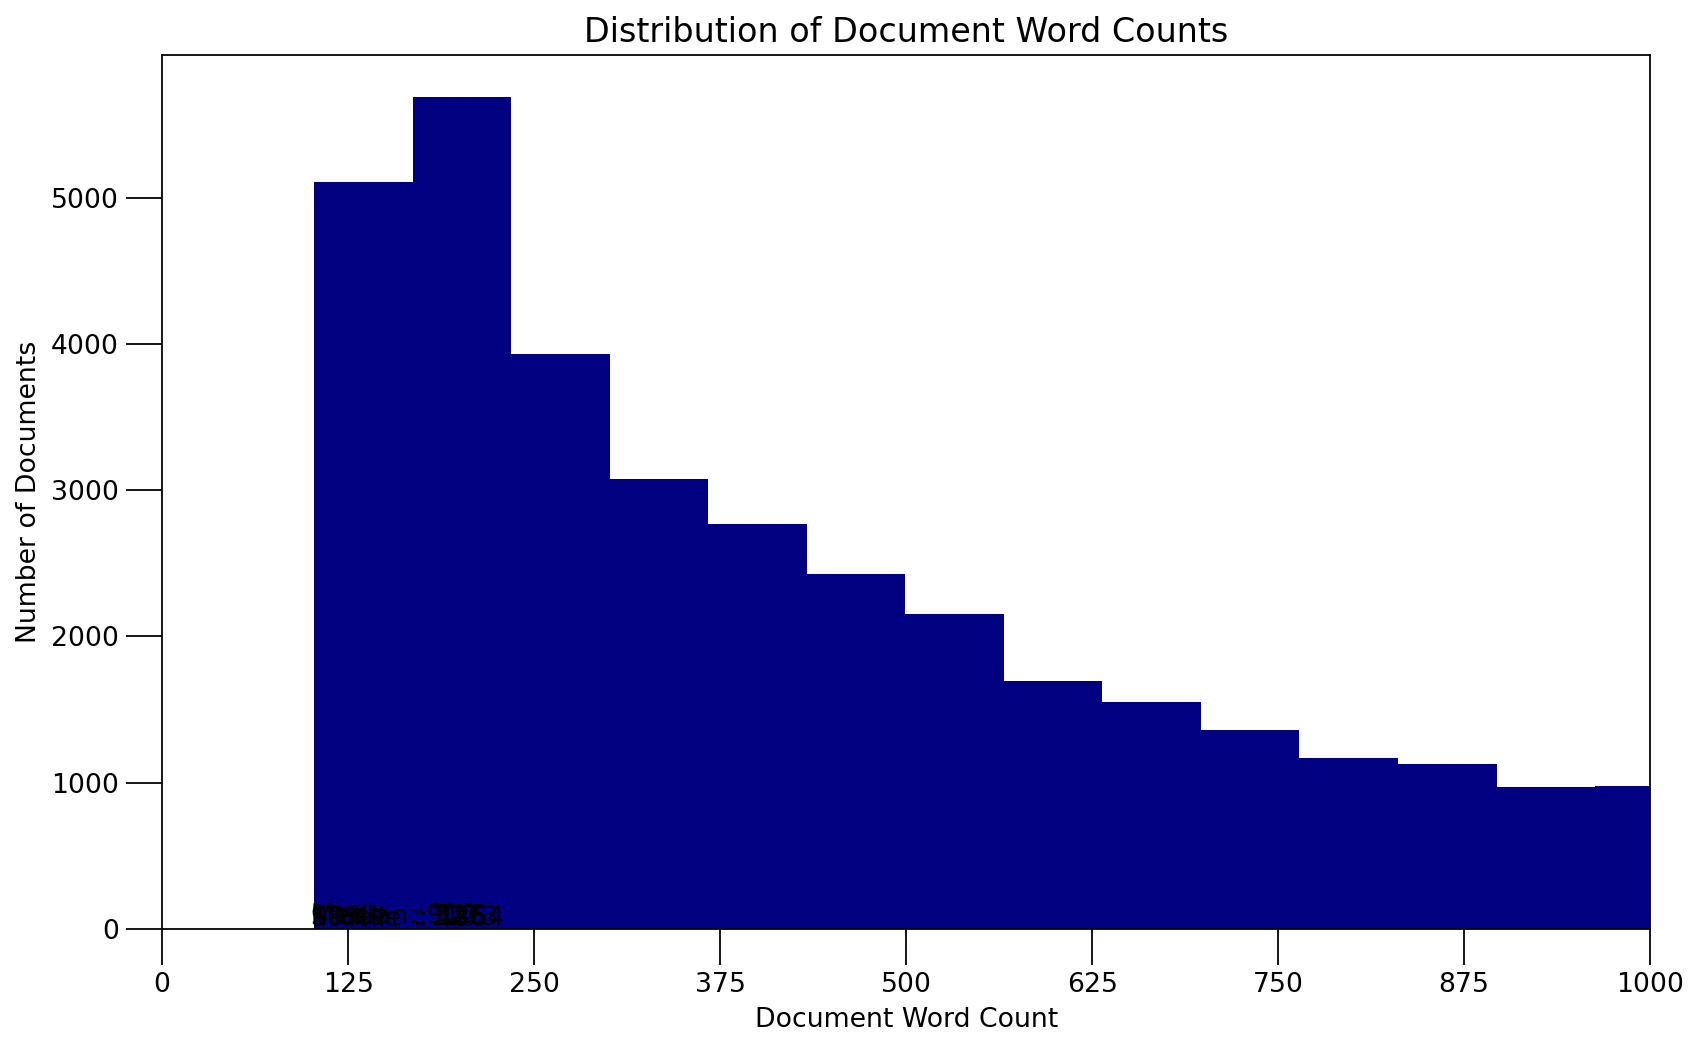

In [106]:
doc_lens = [len(d) for d in df.poem_text]

# Plot
plt.figure(figsize=(12,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(100, 40, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(100,  35, "Median : " + str(round(np.median(doc_lens))))
plt.text(100,  30, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(100,  25, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(100,  20, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=15))

In [109]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

# Convert to list
data = df.poem_text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['عيناك', 'غابتا', 'نخيل', 'ساعه', 'السحر', 'او', 'شرفتان', 'راح', 'يناي', 'عنهما', 'القمر', 'عيناك', 'حين', 'تبسمان', 'تورق', 'الكروم', 'وترقص', 'الاضواء', 'كالاقمار', 'في', 'نهر', 'يرجه', 'المجذاف', 'وهنا', 'ساعه', 'السحر', 'كانما', 'تنبض', 'في', 'غوريهما', 'النجوم', 'وتغرقان', 'في', 'ضباب', 'من', 'اسي', 'شفيف', 'كالبحر', 'سرح', 'اليدين', 'فوقه', 'المساء', 'دفء', 'الشتاء', 'فيه', 'وارتعاشه', 'الخريف', 'والموت', 'والميلاد', 'والظلام', 'والضياء', 'فتستفيق', 'ملء', 'روحي', 'رعشه', 'البكاء', 'ونشوه', 'وحشيه', 'تعانق', 'السماء', 'كنشوه', 'الطفل', 'اذا', 'خاف', 'من', 'القمر', 'كان', 'اقواس', 'السحاب', 'تشرب', 'الغيوم', 'وقطره', 'فقطره', 'تذوب', 'في', 'المطر', 'وكركر', 'الاطفال', 'في', 'عراءش', 'الكروم', 'ودغدغت', 'صمت', 'العصافير', 'علي', 'الشجر', 'انشوده', 'المطر', 'مطر', 'مطر', 'مطر', 'تثاءب', 'المساء', 'والغيوم', 'ما', 'تزال', 'تسح', 'ما', 'تسح', 'من', 'دموعها', 'الثقال', 'كان', 'طفلا', 'بات', 'يهذي', 'قبل', 'ان', 'ينام', 'بان', 'امه', 'التي', 'افاق', 'منذ', 'عام', 'فلم', 'يجدها', 'ثم'

## K-means

In [112]:
from sklearn.cluster import KMeans

documents = df 

X = tfidf.fit_transform(df.poem_text)

In [113]:
true_k = 8
model = KMeans(n_clusters=true_k, init='k-means++',random_state=100, max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 انا
 الهوي
 الحب
 انت
 قلبي
 علي
 اني
 القلب
 الي
 فيك
Cluster 1:
 علي
 الي
 اليل
 حتي
 الارض
 انا
 الريح
 بلا
 وانا
 الان
Cluster 2:
 علي
 الي
 انا
 اليل
 الان
 انت
 البحر
 الارض
 وانا
 حتي
Cluster 3:
 اله
 علي
 الي
 الناس
 الحق
 انت
 فان
 فما
 حتي
 عنه
Cluster 4:
 علي
 الي
 حتي
 فما
 ولم
 الناس
 فان
 اني
 يوم
 ام
Cluster 5:
 كنت
 علي
 اني
 الي
 حتي
 انت
 منك
 فما
 انا
 ولم
Cluster 6:
 علي
 الي
 ولم
 فما
 الدهر
 حتي
 اله
 الناس
 فان
 وكم
Cluster 7:
 علي
 الي
 واذا
 حتي
 مصر
 الزمان
 يوم
 اله
 الدهر
 ال


In [114]:
model.inertia_

46697.72167736028

In [115]:
model.cluster_centers_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.19431832e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.65240972e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.89386597e-05],
       [2.70507788e-05, 1.67113670e-05, 0.00000000e+00, ...,
        0.00000000e+00, 1.89853433e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.14225911e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Cluster 1 Inertia 46860.0891321261
Cluster 2 Inertia 46809.614850181206
Cluster 3 Inertia 46768.811169295215
Cluster 4 Inertia 46749.166601440775
Cluster 5 Inertia 46731.37237717665
Cluster 6 Inertia 46714.13089839106
Cluster 7 Inertia 46702.306087006524
Cluster 8 Inertia 46687.640180911774
Cluster 9 Inertia 46677.964478771064
Cluster 10 Inertia 46667.1701766732
Cluster 11 Inertia 46658.62747430282
Cluster 12 Inertia 46652.26826553295
Cluster 13 Inertia 46639.934233010514
Cluster 14 Inertia 46631.00898852797
Cluster 15 Inertia 46624.503266636915
Cluster 16 Inertia 46615.50194469408
Cluster 17 Inertia 46606.71473145326
Cluster 18 Inertia 46602.81681095026
Cluster 19 Inertia 46588.330150839836


Text(0, 0.5, 'WCSS')

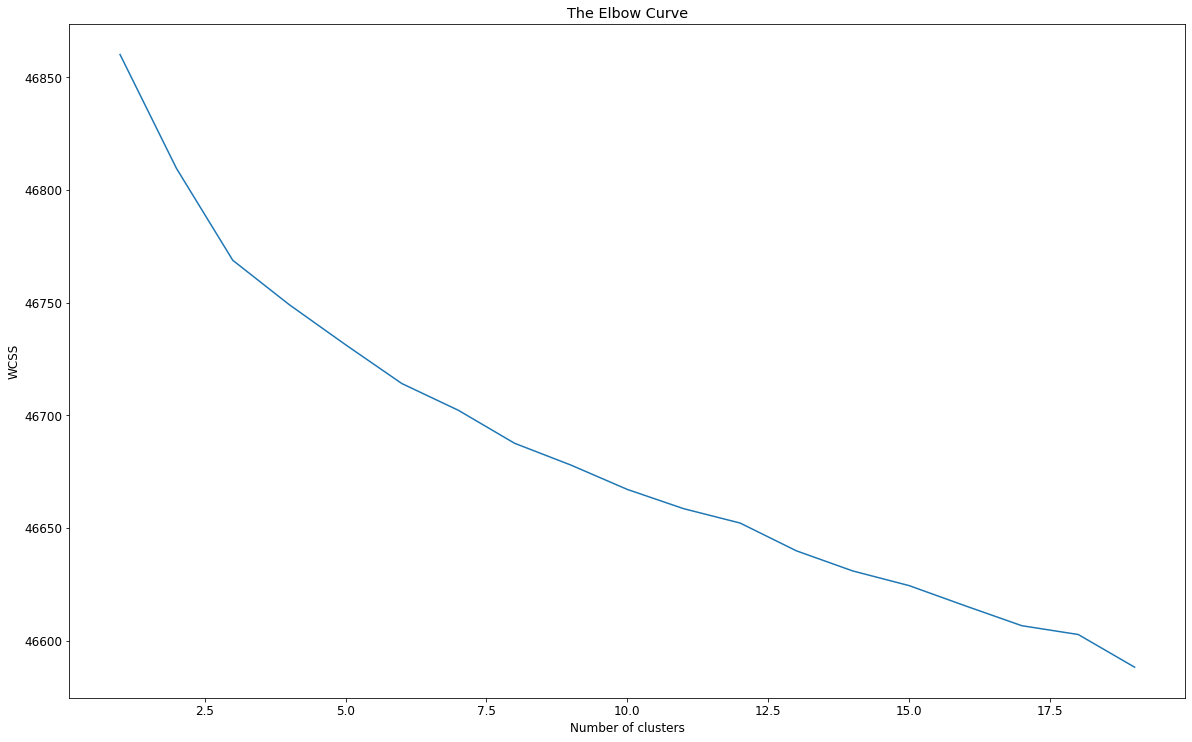

In [116]:
wcss = []
for i in range(1,20):

  kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,n_init=10,random_state=100)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print('Cluster', i, 'Inertia', kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square

In [117]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
visualizer.show();
# k = 5 

ModuleNotFoundError: No module named 'yellowbrick'

In [119]:
g= sns.scatterplot(data=df, x="poem_text", y="poem_text", hue=kmeans.labels_ )

Error in callback <function flush_figures at 0x0000023525AA43A0> (for post_execute):


KeyboardInterrupt: 

## Hierarchical Clustering

In [120]:
from time import time
from sklearn.cluster import AgglomerativeClustering
X=X.todense()

for linkage in ('ward', 'average', 'complete'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    t0 = time()
    clustering.fit(X)
    print("%s : %.2fs" % (linkage, time() - t0))
  
    # x,y = zip(*X)
    # plt.figure(dpi=200)
    # plt.scatter(x,y,c=plt.cm.rainbow(clustering.labels_*20),s=14)
    # plt.title("Linkage Type: %s" % linkage)

MemoryError: Unable to allocate 175. GiB for an array with shape (47110, 497985) and data type float64